**Import the required Libaries** 

In [5]:
import pandas as pd
import numpy as np
from sklearn.neighbors import LocalOutlierFactor
from matplotlib.colors import to_rgba
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as ex

**Load the dataset**

In [7]:
df=pd.read_csv(r"C:\Users\MEET\Desktop\Stellar project\star_classification.csv")

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   obj_ID       100000 non-null  float64
 1   alpha        100000 non-null  float64
 2   delta        100000 non-null  float64
 3   u            100000 non-null  float64
 4   g            100000 non-null  float64
 5   r            100000 non-null  float64
 6   i            100000 non-null  float64
 7   z            100000 non-null  float64
 8   run_ID       100000 non-null  int64  
 9   rerun_ID     100000 non-null  int64  
 10  cam_col      100000 non-null  int64  
 11  field_ID     100000 non-null  int64  
 12  spec_obj_ID  100000 non-null  float64
 13  class        100000 non-null  object 
 14  redshift     100000 non-null  float64
 15  plate        100000 non-null  int64  
 16  MJD          100000 non-null  int64  
 17  fiber_ID     100000 non-null  int64  
dtypes: float64(10), int64(7),

C:\Users\MEET\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\MEET\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\MEET\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Categorical

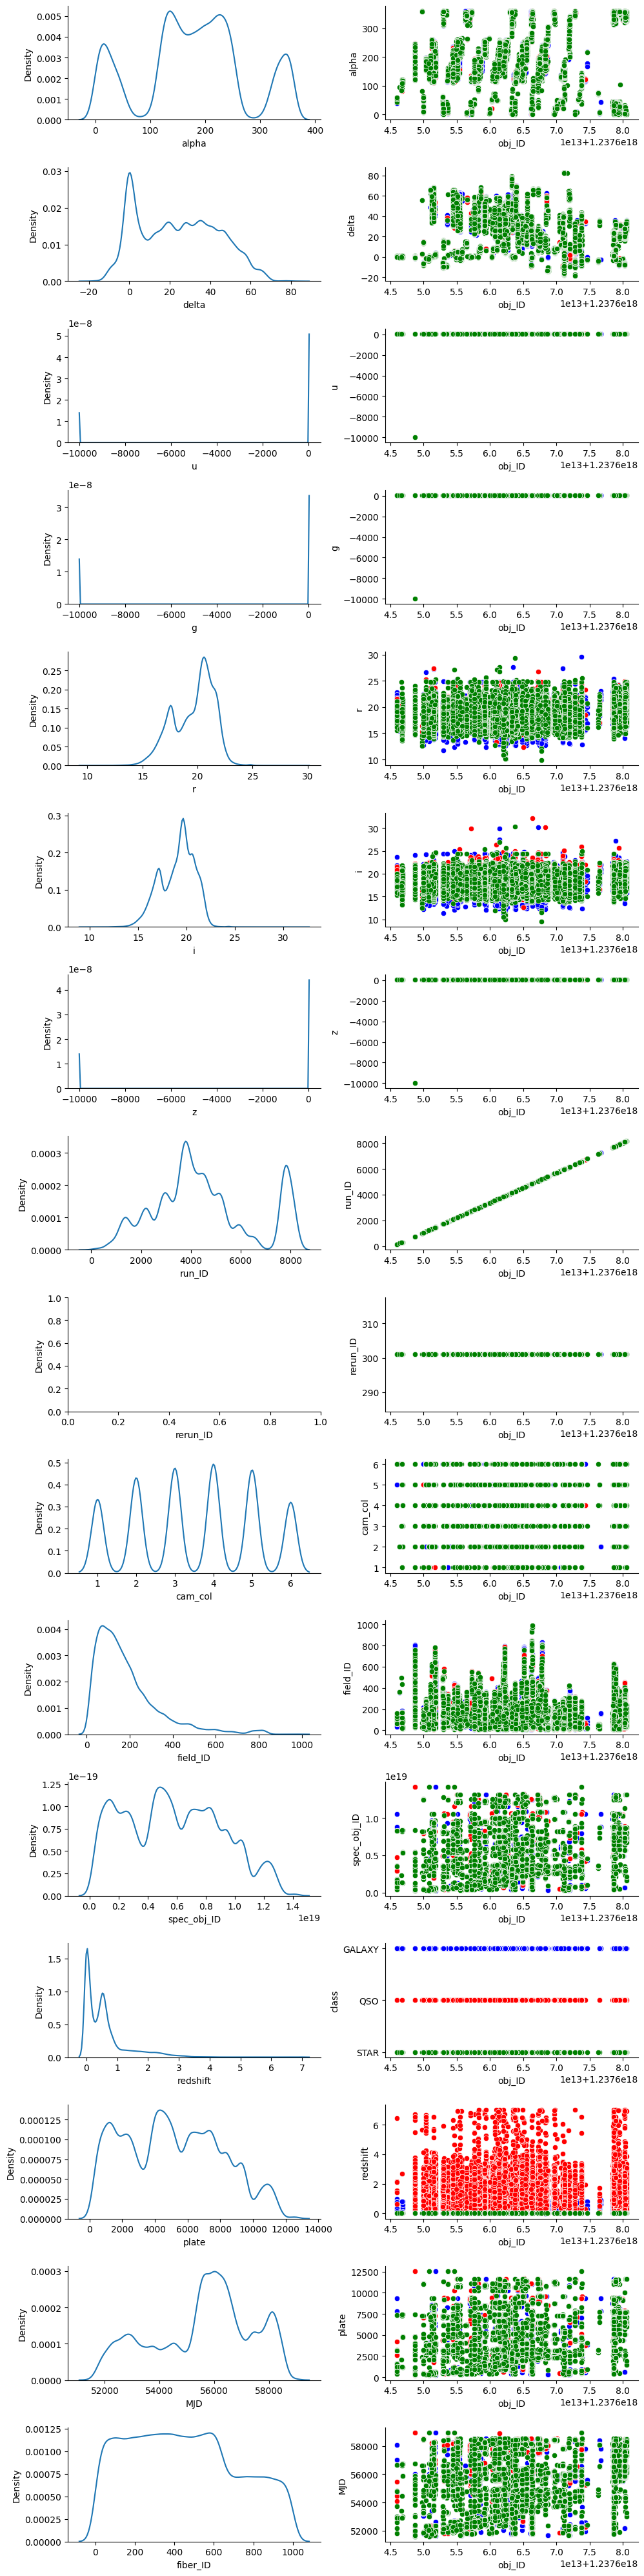

In [9]:
fig, ax = plt.subplots(figsize=(10,40), ncols=2, nrows=16)
df1 = df.select_dtypes(include=["int","float"])
colors = {'GALAXY': 'blue', 'QSO': 'red', 'STAR': 'green'}

for i in np.arange(1,len(df1.columns)):
    sns.kdeplot(df1.iloc[:,i], ax=ax[i-1,0])

for i in np.arange(1,len(df1.columns)):
    for cls in ['GALAXY', 'QSO', 'STAR']:
        data = df[df['class'] == cls]
        sns.scatterplot(x=data.obj_ID, y=data.iloc[:,i], color=colors[cls], ax=ax[i-1,1])


plt.tight_layout()
sns.despine(bottom=False, left=False)

   

**The numerical features (such as u, g, and r) do not have normal distribution 
Here it seems that the redshift plays an important part in the stellar classification since we can clearly distinguish between the various clusters of points**

**Removing irrelevant columns**

In [10]:
df.drop(columns=['alpha','delta',"obj_ID", "run_ID", "rerun_ID", "cam_col", "field_ID", "spec_obj_ID", "plate", "MJD", "fiber_ID"], axis=1, inplace=True)

columns like alpha and delta represent the position of the objects in the sky and 'plate' and 'MJD' features represent observational information

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 7 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   u         100000 non-null  float64
 1   g         100000 non-null  float64
 2   r         100000 non-null  float64
 3   i         100000 non-null  float64
 4   z         100000 non-null  float64
 5   class     100000 non-null  object 
 6   redshift  100000 non-null  float64
dtypes: float64(6), object(1)
memory usage: 5.3+ MB


**Checking for null values**

In [12]:
df.isnull().sum()

u           0
g           0
r           0
i           0
z           0
class       0
redshift    0
dtype: int64

**Checking for duplicate rows**

In [13]:
duplicate = df[df.duplicated()]
duplicate


Empty DataFrame
Columns: [u, g, r, i, z, class, redshift]
Index: []

**Checking outliers**

C:\Users\MEET\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\MEET\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\MEET\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) ins

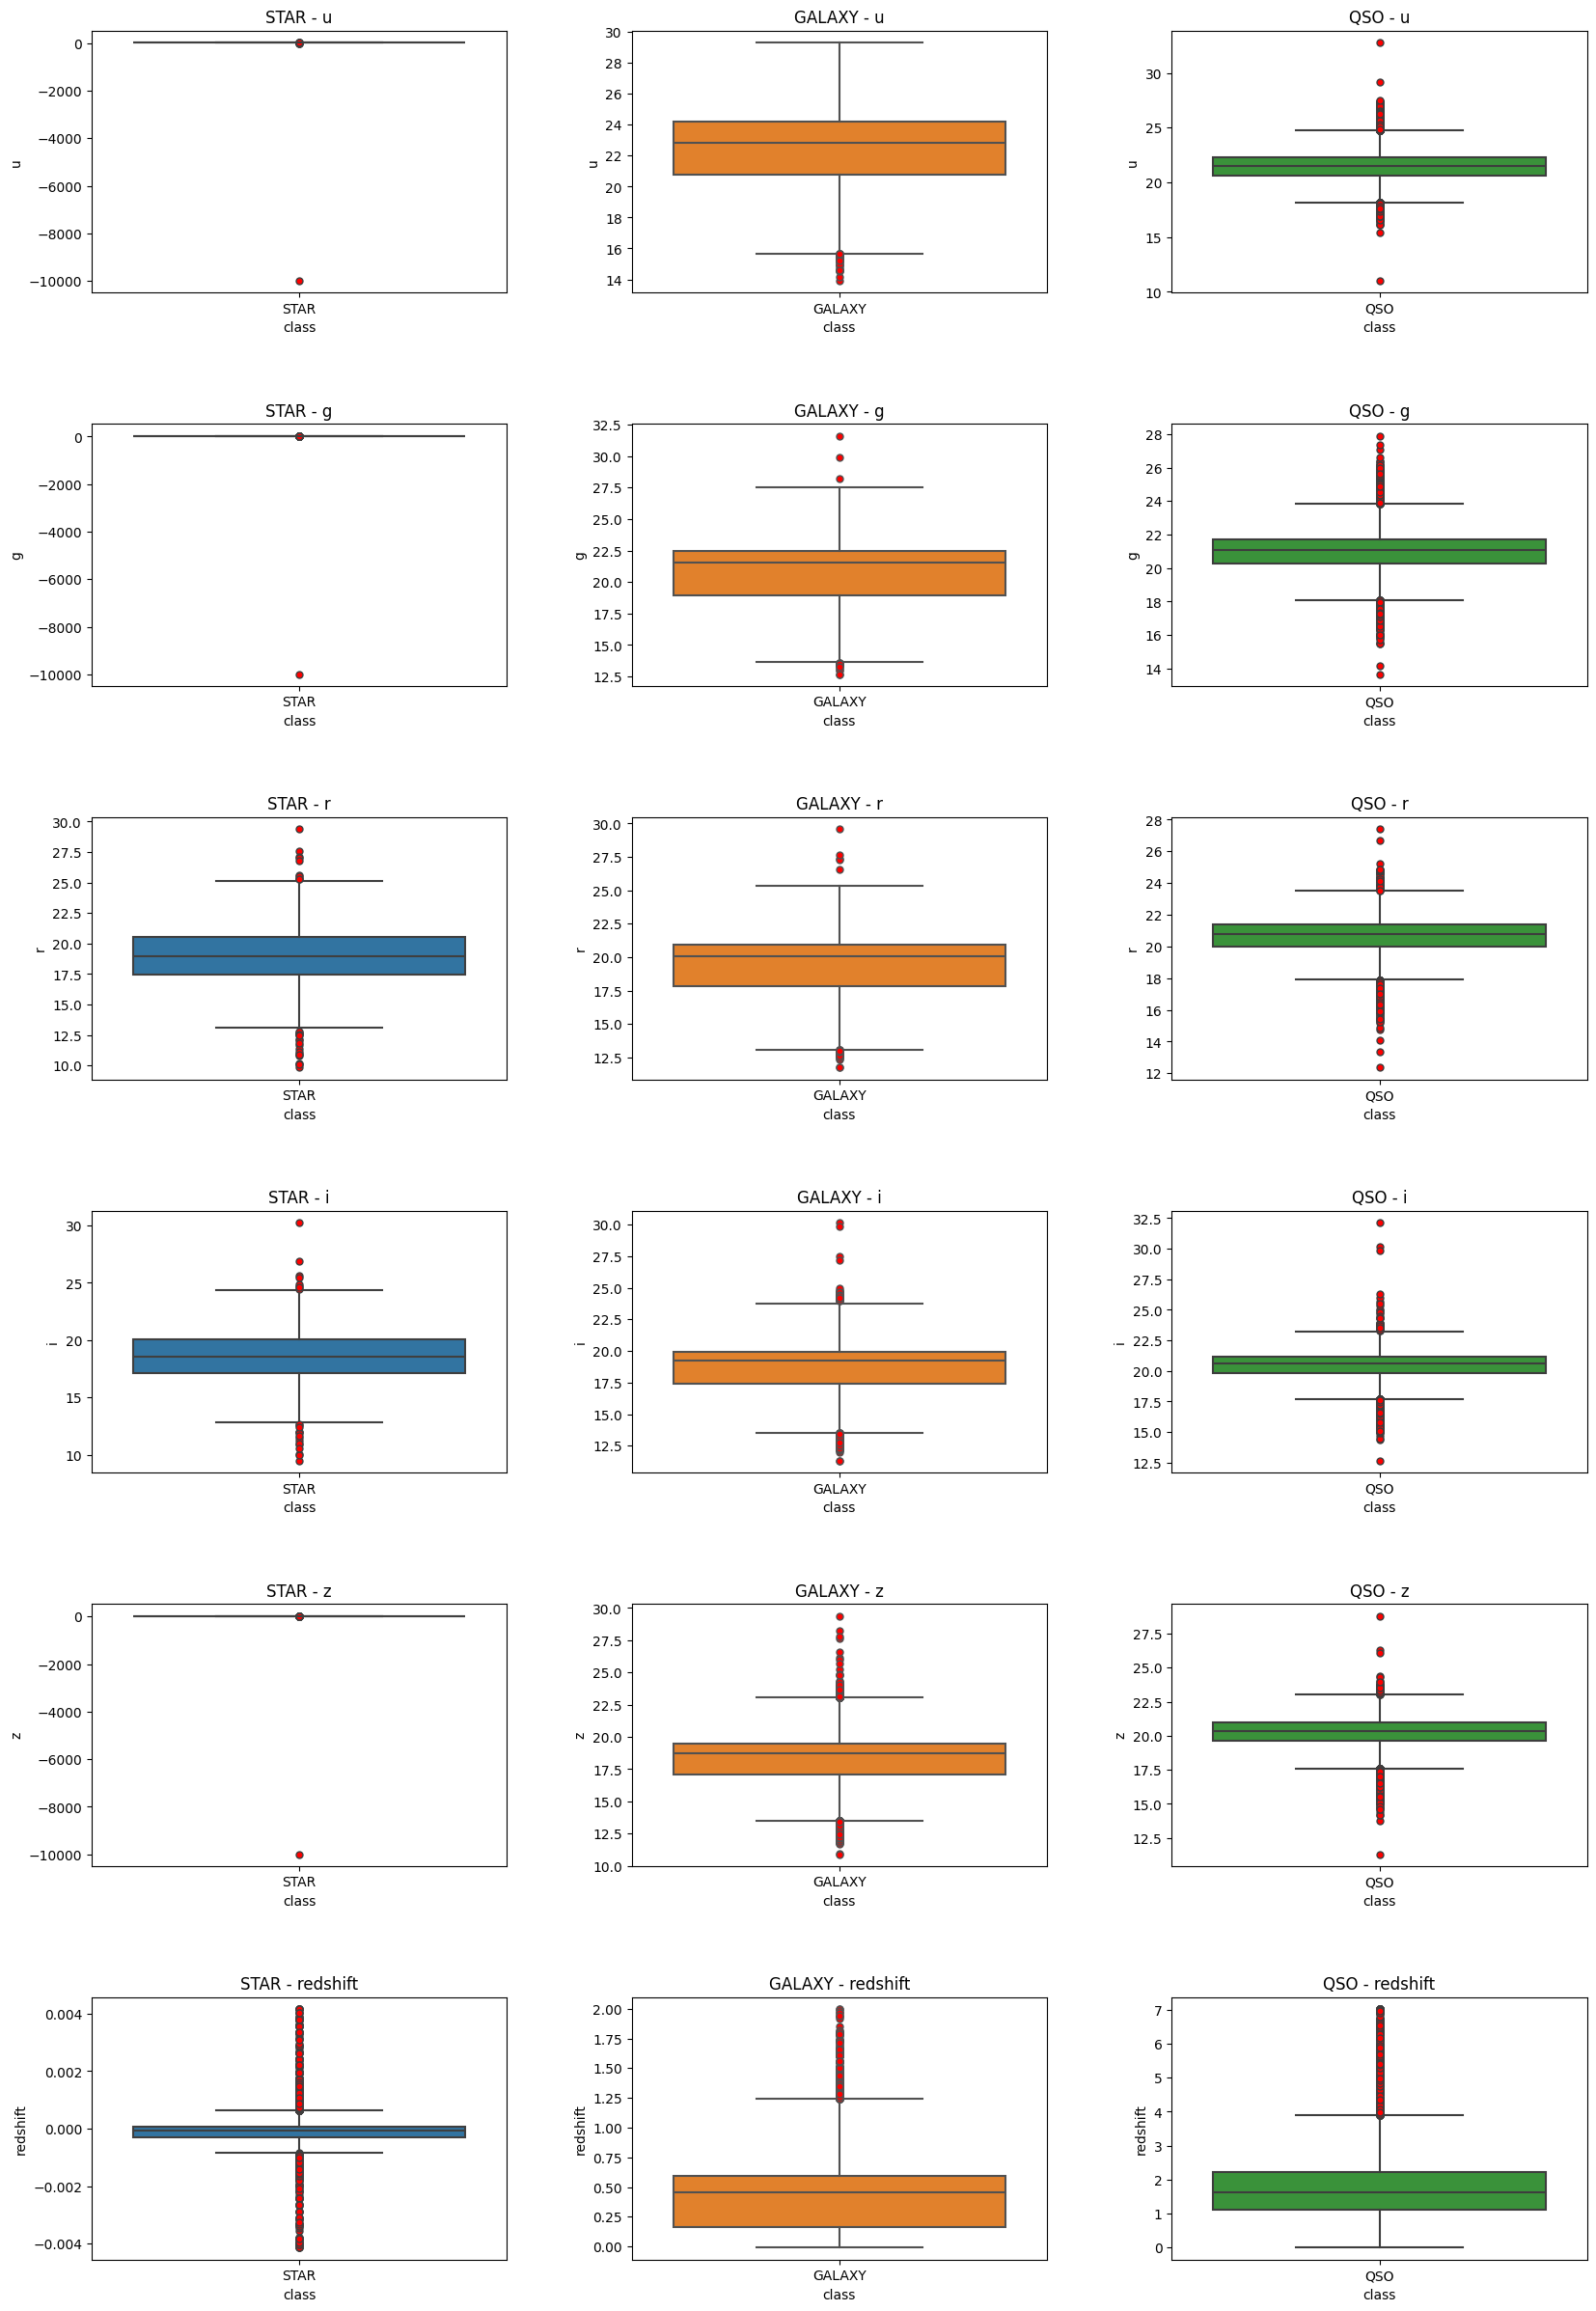

In [14]:
features = ['u', 'g', 'r', 'i', 'z', 'redshift']
classes = ['STAR', 'GALAXY', 'QSO']

fig = plt.figure(figsize=(20, 30))
fig.subplots_adjust(hspace=0.5, wspace=0.3)

for i, feature in enumerate(features):
    for j, class_label in enumerate(classes):
        ax = fig.add_subplot(len(features), len(classes), i * len(classes) + j + 1)
        subset = df[df['class'] == class_label][[feature, 'class']]
        sns.boxplot(x='class', y=feature, data=subset, color=['#1f77b4', '#ff7f0e', '#2ca02c'][j], orient='v', flierprops=dict(markerfacecolor='red', marker='o', markersize=5))
        ax.set_title(f"{class_label} - {feature}")
        ax.set_xlabel('class')
plt.show()

**Replacing class labels from string to integer**

In [15]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['class'] = le.fit_transform(df['class'])


In [16]:
clf = LocalOutlierFactor()
y_pred = clf.fit_predict(df) 

In [17]:
x_score = clf.negative_outlier_factor_
outlier_score = pd.DataFrame()
outlier_score["score"] = x_score
threshold = np.quantile(x_score , .10)                                            
filtre = outlier_score["score"] < threshold
outlier_index = outlier_score[filtre].index.tolist()

In [18]:
len(outlier_index)

10000

In [19]:
df.drop(outlier_index, inplace=True)

In [20]:
df.shape

(90000, 7)

**Checking coorelation**

In [22]:
cm = plt.cm.get_cmap('cool')
df.corr().style.background_gradient(cmap=cm)

C:\Users\MEET\AppData\Local\Temp\ipykernel_11804\3240201307.py:1: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cm = plt.cm.get_cmap('cool')


**There is Data imbalance**

In [24]:
class_map = {0: 'Galaxy', 2: 'Star', 1: 'Quasar'}
mapped_labels = df['class'].map(class_map).values

ex.pie(df, names=mapped_labels, title='Proportion of Different Classes', hole=0.33)

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'domain': {'x': [0.0, 1.0], 'y': [0.0, 1.0]},
              'hole': 0.33,
              'hovertemplate': 'label=%{label}<extra></extra>',
              'labels': array(['Galaxy', 'Galaxy', 'Galaxy', ..., 'Galaxy', 'Galaxy', 'Galaxy'],
                              dtype=object),
              'legendgroup': '',
              'name': '',
              'showlegend': True,
              'type': 'pie'}],
    'layout': {'legend': {'tracegroupgap': 0}, 'template': '...', 'title': {'text': 'Proportion of Different Classes'}}
})

In [25]:
df['class'].value_counts()

class
0    53551
2    19109
1    17340
Name: count, dtype: int64

C:\Users\MEET\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\MEET\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\MEET\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead



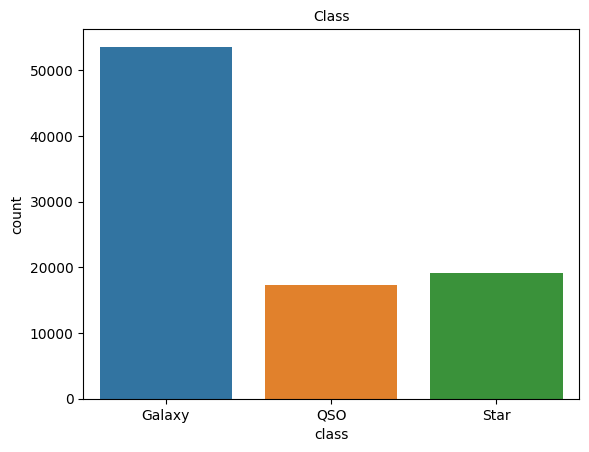

In [26]:
sns.countplot(x = df["class"])
plt.xticks([0, 1, 2], ['Galaxy', 'QSO', 'Star'])
plt.title("Class",fontsize=10)
plt.show()

In [27]:
x = df.drop(['class'], axis = 1)
y = df.loc[:,'class'].values

**Scaling the data**

In [28]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x)
X = scaler.transform(x)

**Data Visualization**

In [29]:
imp_cols = ['u', 'g', 'r', 'i', 'z', 'redshift']

In [30]:
def pdf_plotter(df, features, target):
    plt.figure(figsize=(15, 30))
    for (i, feature) in zip(range(len(features)), features):
        plt.subplot(int('{}2{}'.format(len(features), i+1)))
        sns.kdeplot(data=df, x=feature, hue=target, shade=True)
        plt.title(label='PDF of {}'.format(feature), fontsize=10)
        plt.xlabel(xlabel='')
        plt.grid()
        i += 1
    plt.show()

<ipython-input-119-d0e98e83c421>:5: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


<ipython-input-119-d0e98e83c421>:5: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


<ipython-input-119-d0e98e83c421>:5: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


<ipython-input-119-d0e98e83c421>:5: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


<ipython-input-119-d0e98e83c421>:5: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


<ipython-input-119-d0e98e83c42

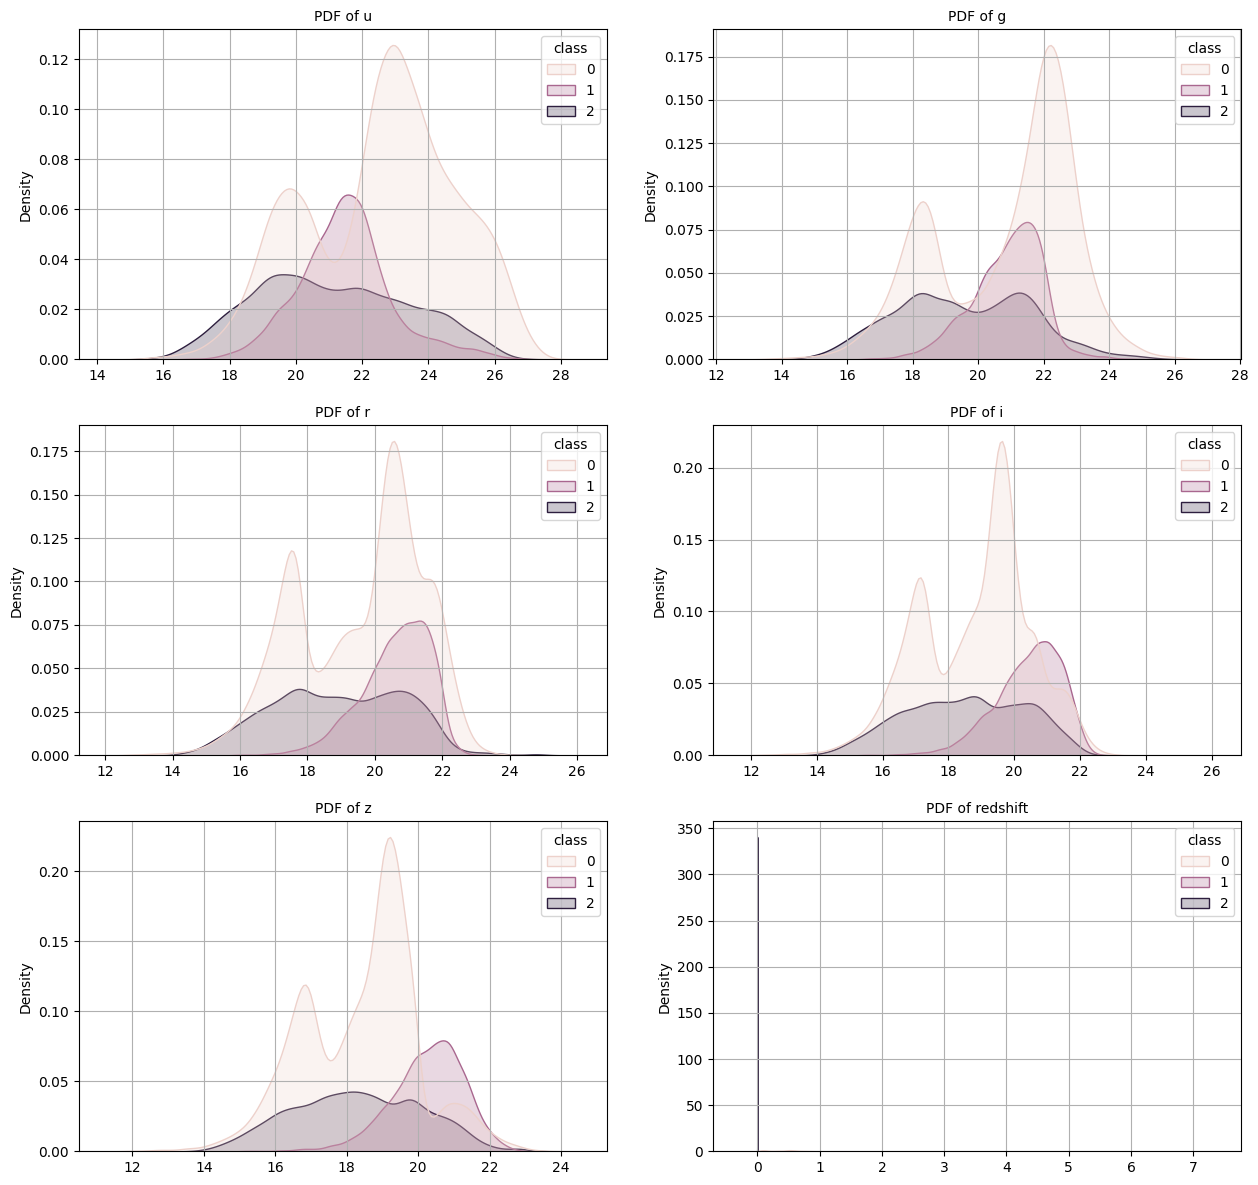

In [ ]:
pdf_plotter(df=df, features=imp_cols, target='class')

**From the above density plots we see that the density of all columns is overlapping, except for the redshift column. In the density plot of the redshift column, the STAR class has all 0 values.**

C:\Users\MEET\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\MEET\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\MEET\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\MEET\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8

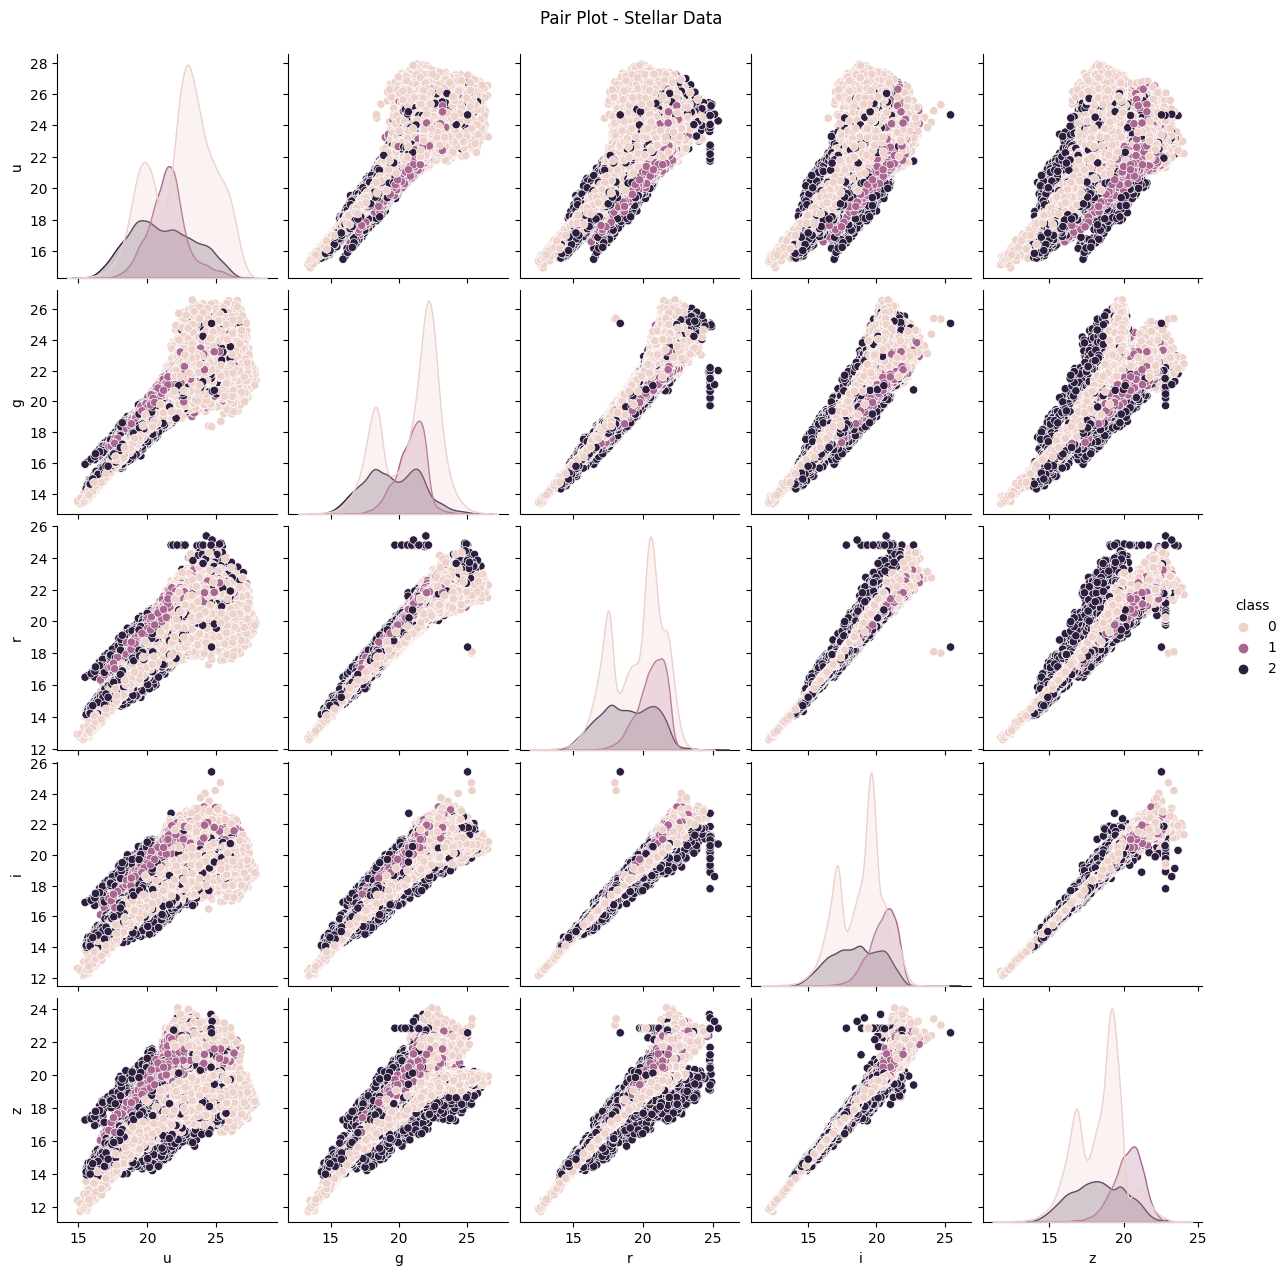

In [31]:
g = sns.pairplot(data=df[['u', 'g', 'r', 'i', 'z', 'class']], hue='class')
g.fig.suptitle(t='Pair Plot - Stellar Data', y=1.02)
plt.show()

**The conclusion is all the features (u, g, r, i, and z) are positively correlated with each other.**

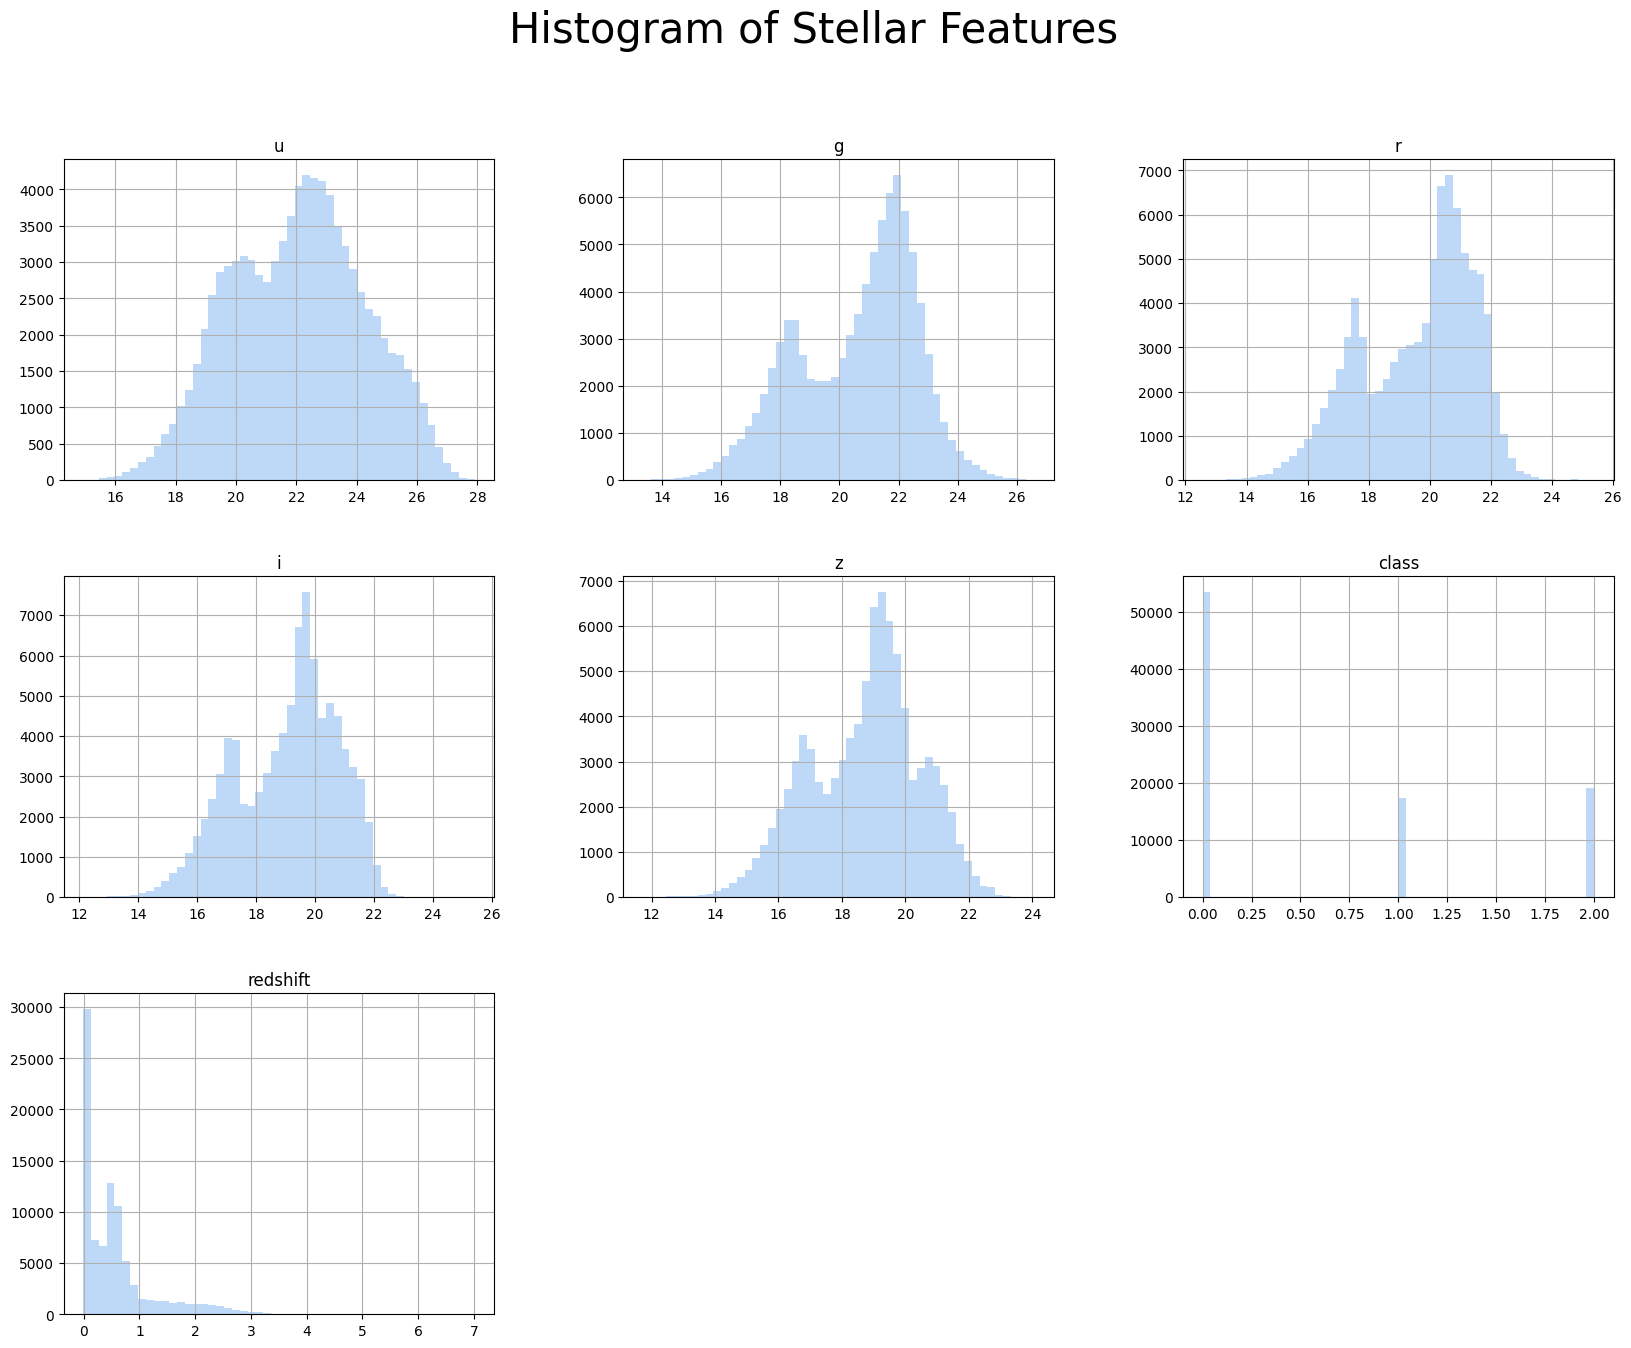

In [32]:
colors = sns.color_palette('pastel')
df.hist(bins=50, figsize=(20,15), color=colors[0], alpha=0.7)
plt.suptitle("Histogram of Stellar Features", fontsize=30)
plt.xlabel("Feature Value", fontsize=20)
plt.ylabel("Frequency", fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()


In [33]:
def plot_joint(df):
    num_features = [col for col in df.columns if df[col].dtype != 'object' and col != 'class']
    for i, feat1 in enumerate(num_features):
        for j, feat2 in enumerate(num_features):
            if j > i: 
                sns.jointplot(x=feat1, y=feat2, data=df, hue="class")
                plt.xlabel(feat1)
                plt.ylabel(feat2)
                plt.show()

C:\Users\MEET\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\MEET\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\MEET\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\MEET\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8

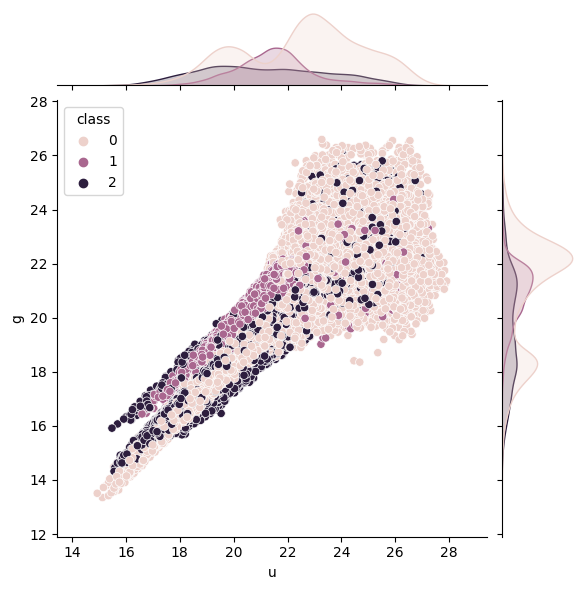

C:\Users\MEET\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\MEET\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\MEET\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\MEET\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8

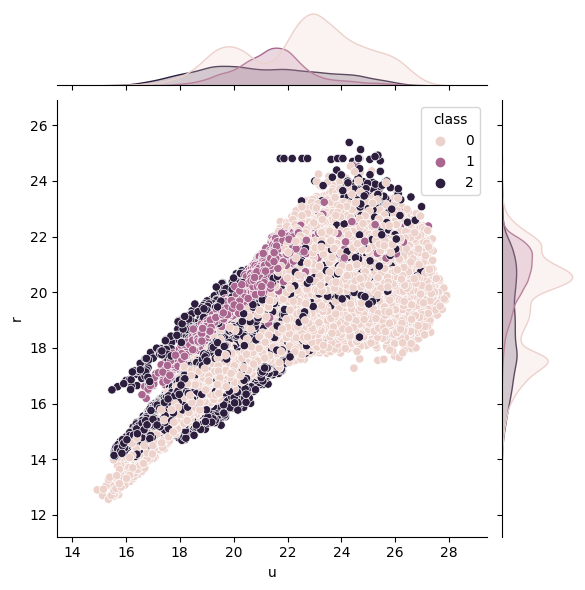

C:\Users\MEET\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\MEET\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\MEET\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\MEET\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8

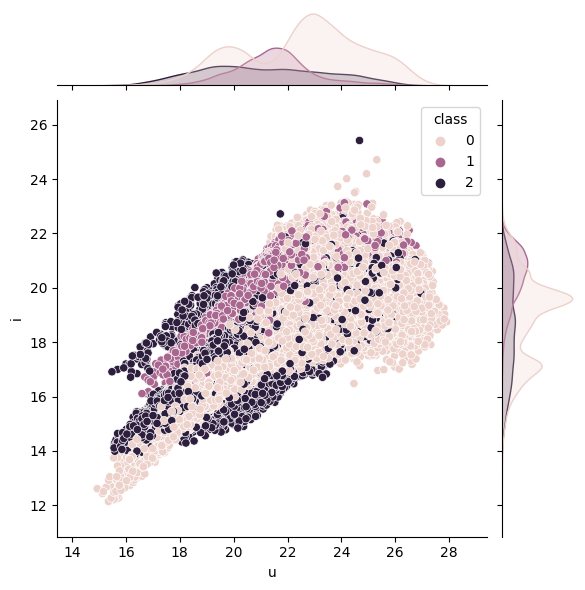

C:\Users\MEET\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\MEET\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\MEET\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\MEET\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8

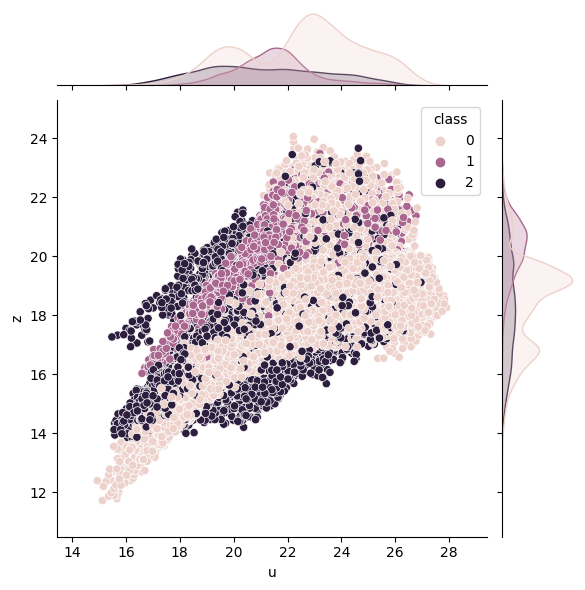

C:\Users\MEET\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\MEET\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\MEET\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\MEET\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8

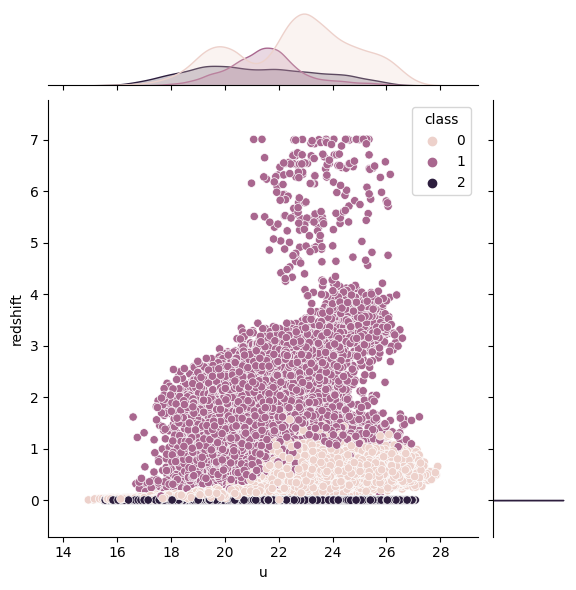

C:\Users\MEET\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\MEET\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\MEET\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\MEET\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8

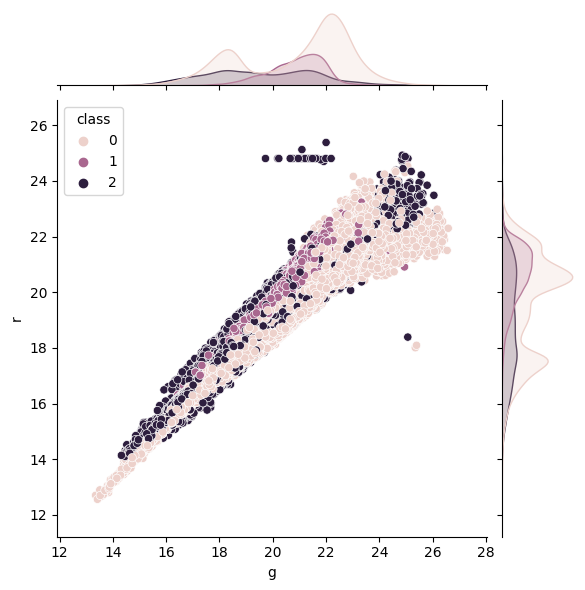

C:\Users\MEET\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\MEET\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\MEET\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\MEET\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8

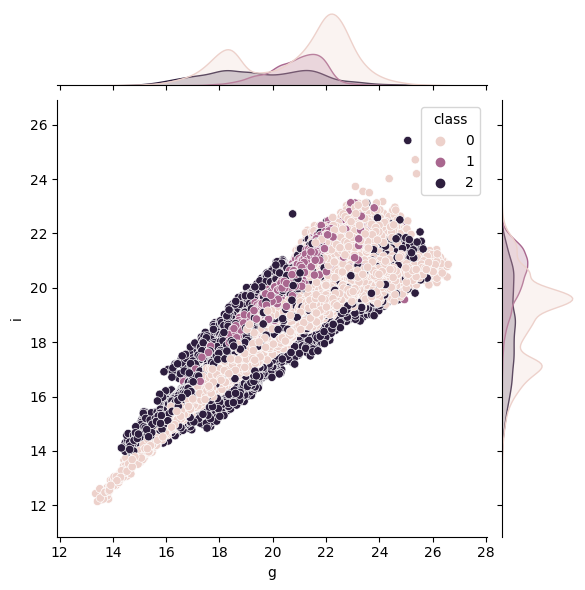

C:\Users\MEET\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\MEET\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\MEET\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\MEET\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8

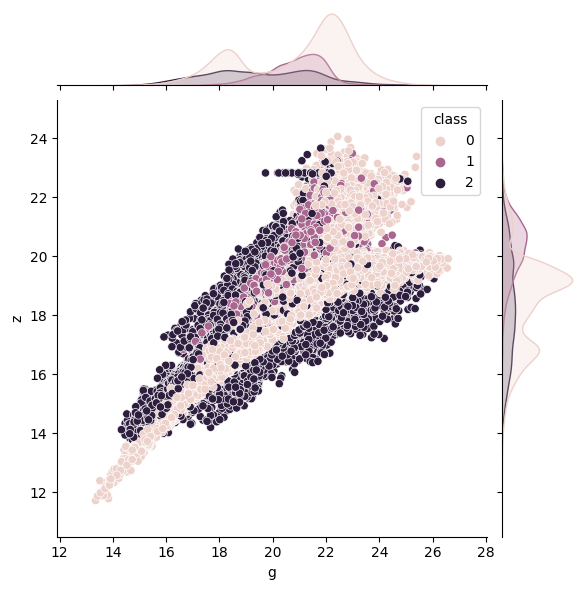

C:\Users\MEET\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\MEET\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\MEET\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\MEET\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8

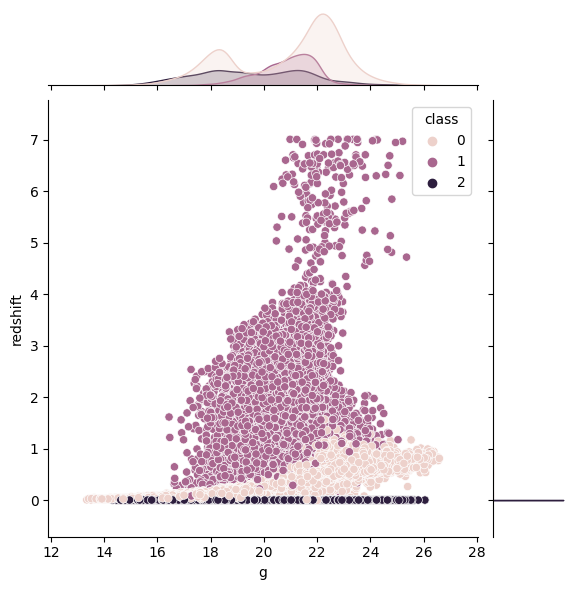

C:\Users\MEET\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\MEET\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\MEET\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\MEET\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8

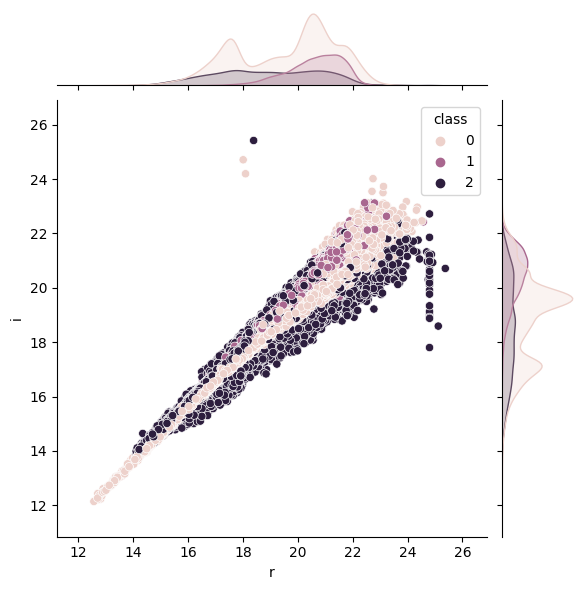

C:\Users\MEET\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\MEET\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\MEET\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\MEET\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8

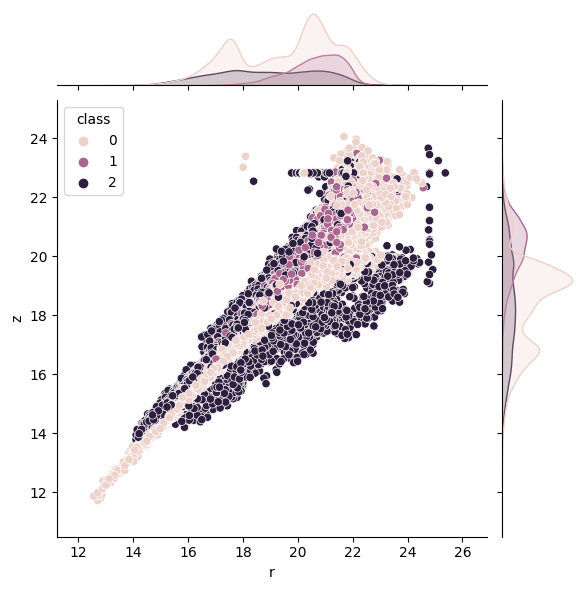

C:\Users\MEET\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\MEET\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\MEET\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\MEET\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8

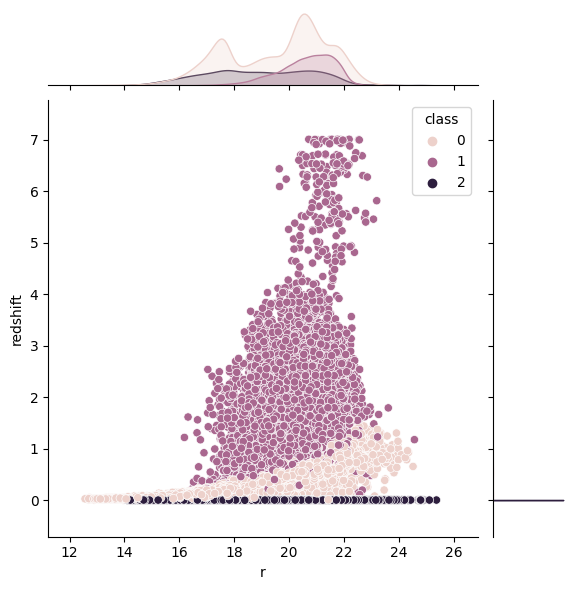

C:\Users\MEET\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\MEET\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\MEET\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\MEET\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8

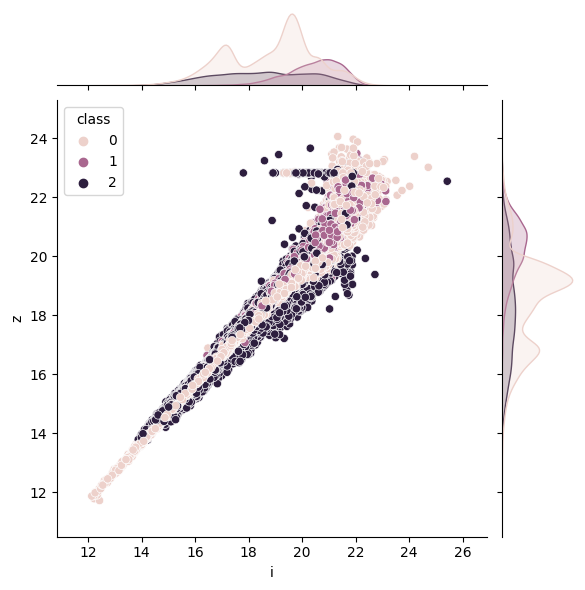

C:\Users\MEET\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\MEET\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\MEET\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\MEET\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8

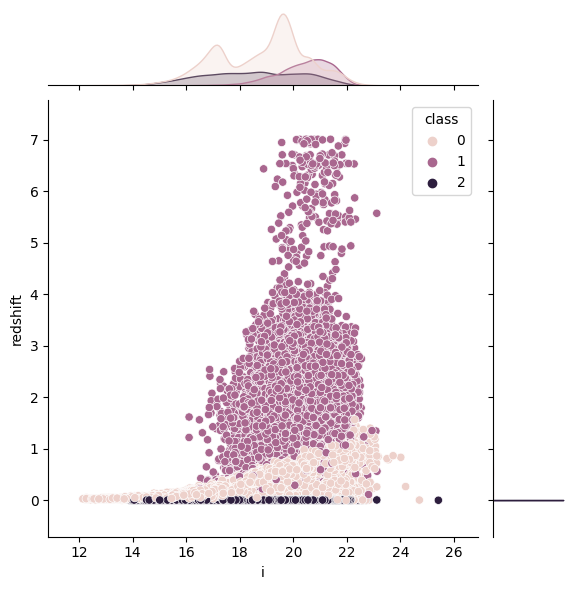

C:\Users\MEET\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\MEET\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\MEET\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\MEET\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8

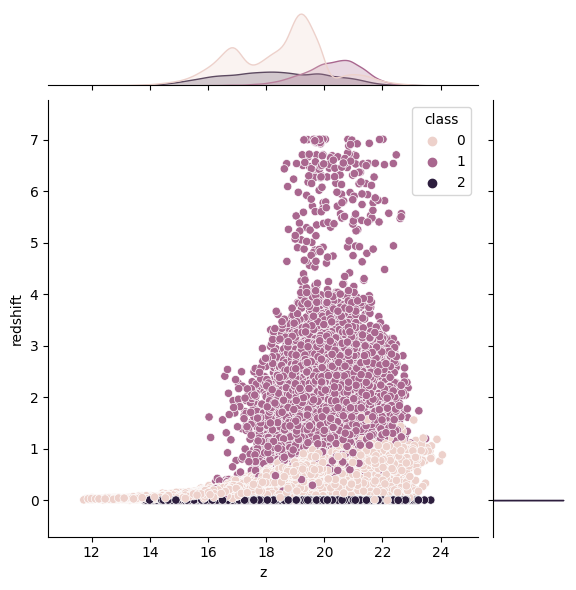

In [34]:
plot_joint(df)

**Building Model**

**Its a multi class problem**

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

**Lets try Ensemble Methods since data is imbalance**

**Using Random Forest**

In [36]:
from sklearn.ensemble import RandomForestClassifier
final_model = RandomForestClassifier()
final_model.fit(X_train, y_train)
y_pred1 = final_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred1)
print('Accuracy:', accuracy)

Accuracy: 0.9844444444444445


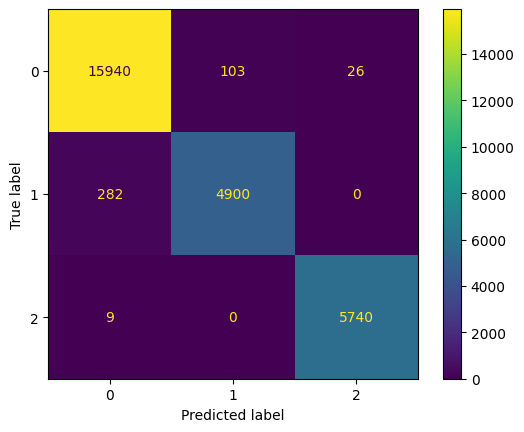

In [37]:
from sklearn import metrics
c_matrix_test = metrics.confusion_matrix(y_test, y_pred1)
disp = ConfusionMatrixDisplay(confusion_matrix=c_matrix_test)
disp.plot()

In [38]:
print(metrics.classification_report(y_pred1,y_test))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99     16231
           1       0.95      0.98      0.96      5003
           2       1.00      1.00      1.00      5766

    accuracy                           0.98     27000
   macro avg       0.98      0.99      0.98     27000
weighted avg       0.98      0.98      0.98     27000



**Using Gradient Boosting**

In [39]:
from sklearn.ensemble import GradientBoostingClassifier
gd=GradientBoostingClassifier()
gd.fit(X_train, y_train)
ypred02=gd.predict(X_test)
accuracy = accuracy_score(y_test, ypred02)
print('Accuracy:', accuracy)

Accuracy: 0.9807777777777777


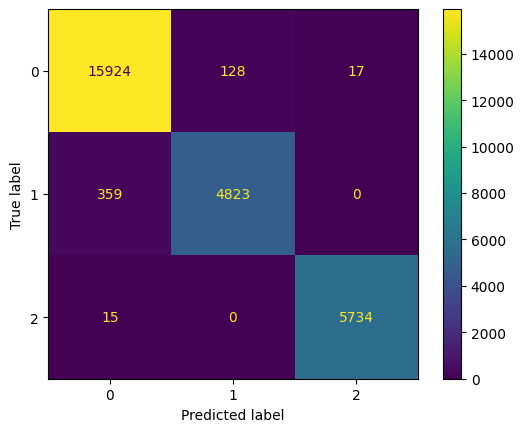

In [40]:
from sklearn import metrics
c_matrix_test = metrics.confusion_matrix(y_test, ypred02)
disp = ConfusionMatrixDisplay(confusion_matrix=c_matrix_test)
disp.plot()

In [143]:
print(metrics.classification_report(ypred02,y_test))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98     16298
           1       0.93      0.97      0.95      4951
           2       1.00      1.00      1.00      5751

    accuracy                           0.98     27000
   macro avg       0.97      0.98      0.98     27000
weighted avg       0.98      0.98      0.98     27000



**Using XG Bosst**

In [41]:
from xgboost import XGBClassifier
xgb_clf = XGBClassifier()
xgb_clf.fit(X_train, y_train)
ypred01=xgb_clf.predict(X_test)
accuracy = accuracy_score(y_test, ypred01)
print('Accuracy:', accuracy)

ModuleNotFoundError: No module named 'xgboost'

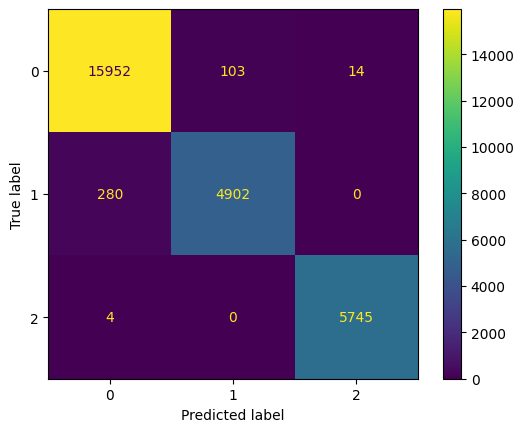

In [ ]:
from sklearn import metrics
c_matrix_test = metrics.confusion_matrix(y_test, ypred01)
disp = ConfusionMatrixDisplay(confusion_matrix=c_matrix_test)
disp.plot()

In [ ]:
print(metrics.classification_report(ypred01,y_test))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99     16236
           1       0.95      0.98      0.96      5005
           2       1.00      1.00      1.00      5759

    accuracy                           0.99     27000
   macro avg       0.98      0.99      0.98     27000
weighted avg       0.99      0.99      0.99     27000



**Lets try decision tree**

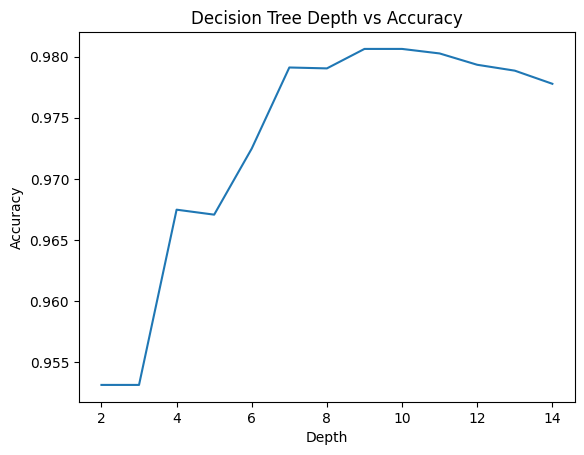

In [ ]:
from sklearn.tree import DecisionTreeClassifier
depths = range(2, 15)
accuracies = []
for depth in depths:
    dt = DecisionTreeClassifier(max_depth=depth)
    dt.fit(X_train, y_train)
    accuracy = dt.score(X_test, y_test)
    accuracies.append(accuracy)

plt.plot(depths, accuracies)
plt.xlabel('Depth')
plt.ylabel('Accuracy')
plt.title('Decision Tree Depth vs Accuracy')
plt.show()


**We can see that best parameter value for depth is 9**

In [ ]:
clf = DecisionTreeClassifier(max_depth=9,random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=9, random_state=42)

In [ ]:
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.9807037037037037


In [ ]:
from sklearn.ensemble import AdaBoostClassifier
ab = AdaBoostClassifier(base_estimator=clf, n_estimators=100, learning_rate=0.1)
ab.fit(X_train, y_train)
y_pred = ab.predict(X_test)
accuracy = ab.score(X_test, y_test)
print(f"Accuracy: {accuracy}")

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning:

`base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.



Accuracy: 0.9842962962962963


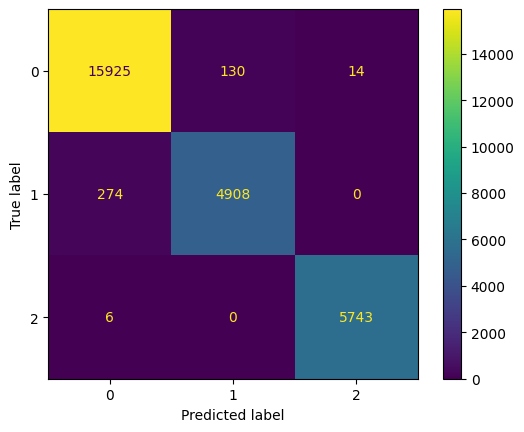

In [ ]:
from sklearn import metrics
c_matrix_test = metrics.confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=c_matrix_test)
disp.plot()

In [ ]:
print(metrics.classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99     16205
           1       0.95      0.97      0.96      5038
           2       1.00      1.00      1.00      5757

    accuracy                           0.98     27000
   macro avg       0.98      0.98      0.98     27000
weighted avg       0.98      0.98      0.98     27000



**We can clearly see that we can get the most accuracy using XG Boost Classifier**

**After performing machine learning on the Stellar dataset, the XGBoost algorithm was found to provide the highest accuracy among the different algorithms that were tested. This indicates that XGBoost is well-suited to the task of classifying the Stellar objects based on their features.**